## **Telcom Customer Churn Analysis**
---
**Author:** Nora Dong 
**E-mail:** nuodong21@gmail.com  


## Content
---
### I. Introduction
- Motivation and Design
- Dataset

### II. Data Pre-processing
- Prepare data and packages
- Data cleaning and transformation 

### III. Exploratory data analysis (EDA)
- Churn (dependent variable)
- Customer demographics and account features 

### IV. Churn Prediction (Supervised Machine Learning)
- Model preparation
 - Cross validation 
 - Class balancing
- Model fitting
 - Adaboost
 - Decision Tree
 - Logistic Regression
 - Random Forest
- Model evaluation
 - Performance metrics
 - ROC and refit time curve
 - Confusion matrix
 - Classification report 

### V. Factorial Analysis
- Adaboost's Important Variables
- Decision Tree's Plot

### VI. Customer Segmentation
- Naive method
- K-means clustering

### VII. Conclusion and Discussion



---
## Introduction

#### Motivation and Design
This research aims to fill the gap of research in Telecom customer retention strategies with a novel churn analysis framework. Based on the existing knowledge and research gap in telecom churn analysis, the paper introduces the framework which combines churn prediction and customer segmentation. Then four machine learning models are trained, assessed and implemented to predict the churn, and to select important contributors based on the best-performed model. In customer segmentation analysis, the paper will first use a naive method to group the customers by different churn probabilities; K-means clustering will further segment customers who are more likely to churn and the churn contributors will be fed into customer segments. Last, the paper provides managerial insights and recommendations based on specific characteristics in different segments. Future research directions and limitations are also discussed. 

#### Dataset
The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California post on 07/14/2021. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

- source: https://community.ibm.com/accelerators/catalog/content/Customer-churn
- Dependent Variabel (DV)
Churn (factor)- Whether the customer churned or not (1 = Yes or 0 = No)
- Independent Variables (IV)
The data set includes information about services data, demographic information, and customer account information inclusing usage and interaction with the firm. Here is the detailed description:
1. LoyaltyID (numeric) - need to remove
2. Customer ID (factor) - need to remove
3. Senior Citizen (factor) - Whether the customer is a senior citizen or not (1,0)     
4. Partner (factor) - Whether the customer has a partner or nor (Yes, No)
5. Dependents(factor) - Whether the customer has dependents or not (Yes, No)
6. Tenure (numeric) - Number of months the customer has stayed with the company
7. Phone Service (factor)- Whether the customer has a phone service of no (Yes, No)
8. Multiple Lines (factor)- Whether the customer has multiple lines or not (Yes, No, No phone service)
9. Internet Service  (factor)- Customer's internet service provider (DSL, Fiber optic, No)
10. Online Security (factor)- Whether the customer has online security or not (Yes, No, No internet service)
11. Online Backup  (factor)- Whether the customer has online backup or not (Yes, No, No internet service)
12. Device Protection (factor)- Whether the customer has tech support or not (Yes, No, No internet service)
13. Tech Support (factor)- Whether the customer has technical support(Yes, No, No internet service)
14. Streaming TV (factor) - Whether the customer has streaming TV or not (Yes, No, No internet service)
15. Streaming Movies (factor)- Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract (factor)- The contract term of the customer (Month-to-month, One year, Two year)
17. Paperless Billing (factor) - Whether the customer has paperless billing or not (Yes, No)
18. Payment Method (factor) - The customer's payment method (Electronic CHECK, Mailed check)
19. Monthly Charges (numeric) - The amount charged to the customer monthly
20. Total Charges (numeric)  - The total amount charged to the customer



---
## Data Pre-processing

In [1]:
# solve package loading issues
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
#import packages
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import tree
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
rawDat=pd.read_excel('/content/CustomerChurn.xlsx')

rawDat.head(5)

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,344543,4472-LVYGI,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1,150036,3115-CZMZD,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
2,497688,5709-LVOEQ,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3,158969,4367-NUYAO,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
4,470044,1371-DWPAZ,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [4]:
rawDat.shape

(7043, 21)

In [5]:
rawDat.dtypes
# total changes shoud be float

LoyaltyID              int64
Customer ID           object
Senior Citizen        object
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object

In [6]:
#As excel treated the datatype differently, we need to replace the missing value with space first before removing 
rawDat['Total Charges'] = rawDat['Total Charges'].replace(' ', np.nan)
rawDat.dtypes

LoyaltyID              int64
Customer ID           object
Senior Citizen        object
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn                 object
dtype: object

In [7]:
rawDat = rawDat.dropna() # drop missing
print(rawDat.nunique())

LoyaltyID            7010
Customer ID          7032
Senior Citizen          2
Partner                 2
Dependents              2
Tenure                 72
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1584
Total Charges        6530
Churn                   2
dtype: int64


In [8]:
rawDat['Multiple Lines'].unique()

array(['Yes', 'No', 'No phone service'], dtype=object)

#### Detect Hierarchy relationships in our dataset. 
1. IF customer answer 'no' to 'Phone Service', 'Multiple Lines' will show 'no phone service'. 
2. IF customer said 'no' to 'Internet Service', there are a bunch of 'No internet service' answer to internet questions.



---
## Exploratory data analysis (EDA)

#### Explore the Churn (dependent variable)



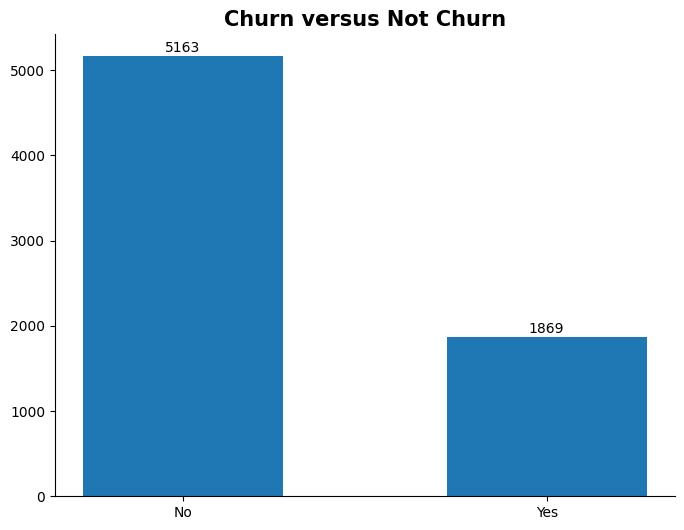

In [9]:
## Output Variable
fig, ax = plt.subplots(1,1, figsize=(8, 6))
data_temp = rawDat['Churn'].value_counts().sort_index()
ax.bar(data_temp.index, data_temp,
          width=0.55 )
ax.set_title('Churn versus Not Churn', fontsize=15, fontweight='bold')
for i in data_temp.index:
    ax.annotate(f"{data_temp[i]}", 
                   xy=(i, data_temp[i] + 100),
                   va = 'center', ha='center',fontweight='light', 
                   color='black')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

### Explore customer demographics and account features we are interested in.

#### 1. Contracts 

Text(0.5, 1.0, 'Contracts versus Churn')

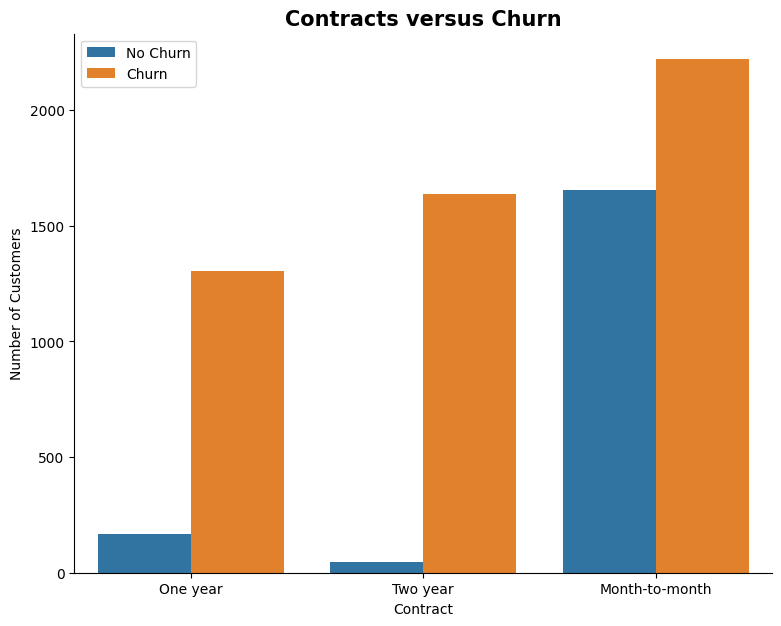

In [10]:
# contracts 
plt.figure(figsize=(9,7))
ax = sns.countplot(x="Contract", hue="Churn", data=rawDat)
sns.despine()
plt.legend(labels=['No Churn', 'Churn'], loc='upper left')
plt.ylabel('Number of Customers')
plt.title('Contracts versus Churn', fontsize=15, fontweight='bold') 

#### 2. Tenure



Text(0.5, 1.0, 'Tenure versus Churn')

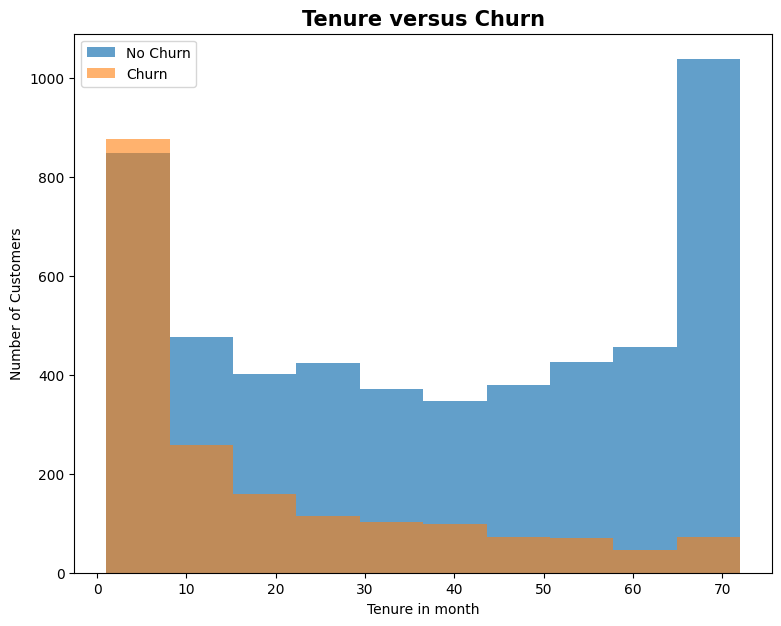

In [11]:
# Visualize Tenure 
df =rawDat.copy()
df["Churn"]= rawDat["Churn"].map({"No" : 0 , "Yes": 1})

Churn_0 = df[df["Churn"] == 0]
Churn_1 = df[df["Churn"] == 1]

# histogram
plt.figure(figsize=(9,7))
plt.hist(Churn_0.Tenure, label='Not Churn', alpha=0.7)
plt.hist(Churn_1.Tenure, label='Churn', alpha=0.6)
plt.legend(labels=['No Churn', 'Churn'], loc='upper left')
plt.xlabel('Tenure in month') 
plt.ylabel('Number of Customers') 
plt.title('Tenure versus Churn', fontsize=15, fontweight='bold') 


#### 3. Proportion of churn split up by Senior Citizen, Tenure, and Internet Service.

In [12]:
# Create Count Plot for Churn Vs Feature
def CountPlot_Table (feature):
    colors = ["darkorange", "lightblue"]
    # Set custom color palette
    sns.set_palette(sns.color_palette(colors))
    sns.countplot(x=feature, hue="Churn", data=rawDat, order=rawDat[feature].value_counts().index)
    sns.despine()
    temp_table = pd.DataFrame(round(rawDat.groupby(feature)['Churn'].value_counts(normalize = True),4))
    table = plt.table(cellText=temp_table.values,
          rowLabels=temp_table.index,
          colLabels=temp_table.columns,
          bbox=(1.5, 0, 0.4 ,0.45))
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    plt.show()

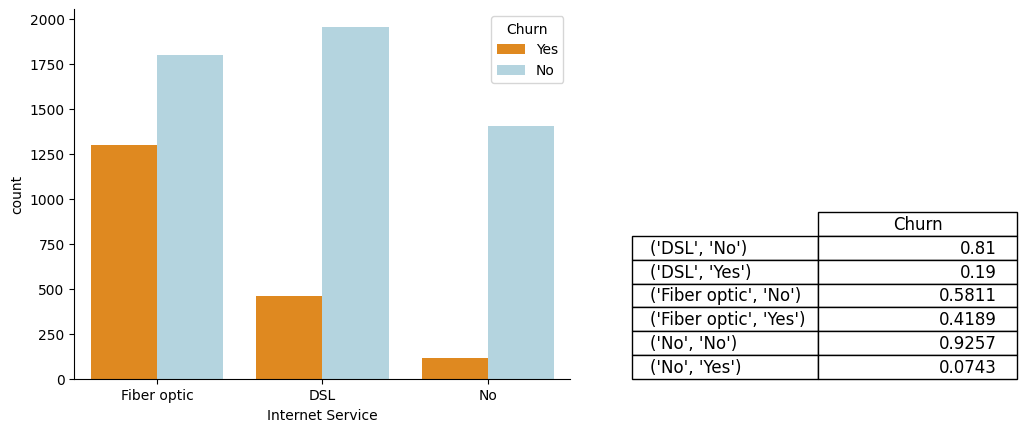

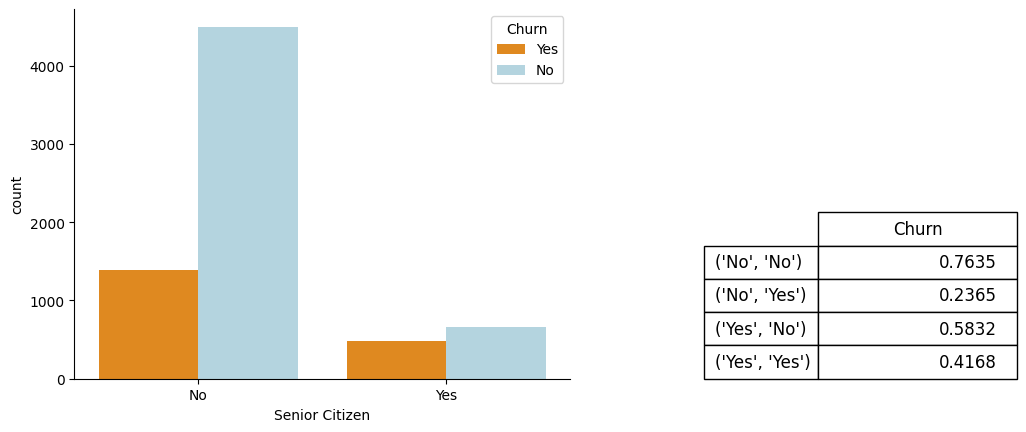

In [13]:
single_features = ['Internet Service','Senior Citizen']
for feature in single_features:
    CountPlot_Table(feature)

In [14]:
plotDat = (rawDat. #data set
           groupby(['Internet Service', 'Tenure', 'Senior Citizen']).
           apply(lambda x: len(x.Churn[x.Churn == 'Yes'])/len(x.Churn)). #function to solve the survial%
           reset_index().
           rename(columns = {0: 'proportionChurned'}))
#plotDat.sample(5)
plotDat

,Internet Service,Tenure,Senior Citizen,proportionChurned
0,DSL,1,No,0.529412
1,DSL,1,Yes,0.800000
2,DSL,2,No,0.485294
3,DSL,2,Yes,0.714286
4,DSL,3,No,0.424242
...,...,...,...,...
389,No,70,Yes,0.000000
390,No,71,No,0.000000
391,No,71,Yes,0.000000
392,No,72,No,0.000000


From the satterplot, we learn that the customers who stayed with the company in a longer amount of time are more likely to stay. Next, let's fit a scatter plot with more detailed info related to internet service and senior citizenship.

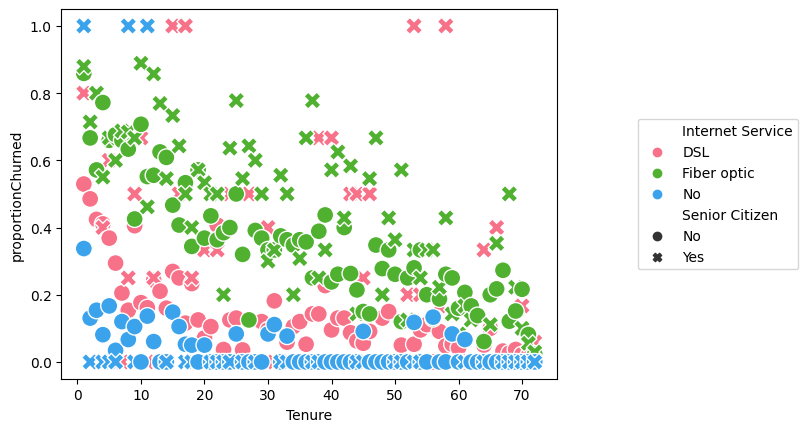

In [15]:
p = sns.scatterplot(
    x = 'Tenure',
    y = 'proportionChurned',
    s = 150,
    style = 'Senior Citizen', # add more variables(levels) 
    hue = 'Internet Service',
    data = plotDat)

p.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5), ncol = 1) # move legend outside of plot

Given the info from the plot above, senior citizens are more likely to churn. When it comes to internet service type, customers who chose Fiber optic have higher chance to churn. 

As the points stayed too crowded, we can treat those features in separate plots to get a better understanding of their impacts on churn proportion.

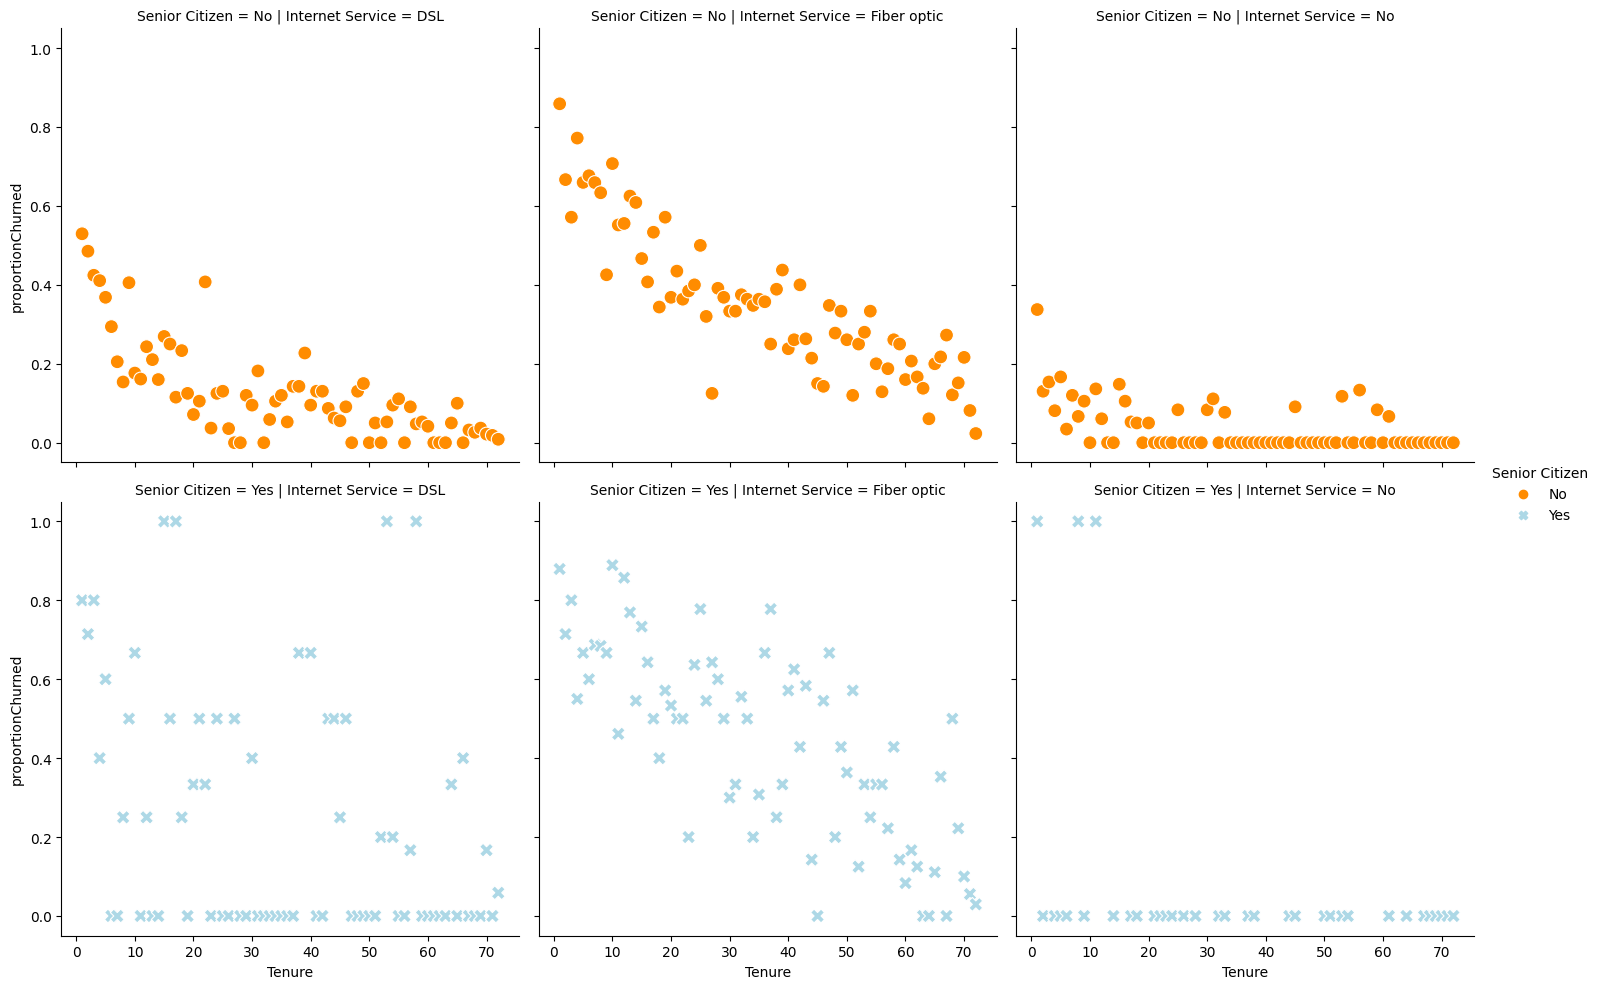

In [16]:
sns.relplot(
    x = 'Tenure',
    y = 'proportionChurned',
    s = 100,
    style = 'Senior Citizen',
    hue = 'Senior Citizen',
    col = 'Internet Service',
    row = 'Senior Citizen',
    kind = 'scatter',
    data = plotDat)

#### 4. Service types 

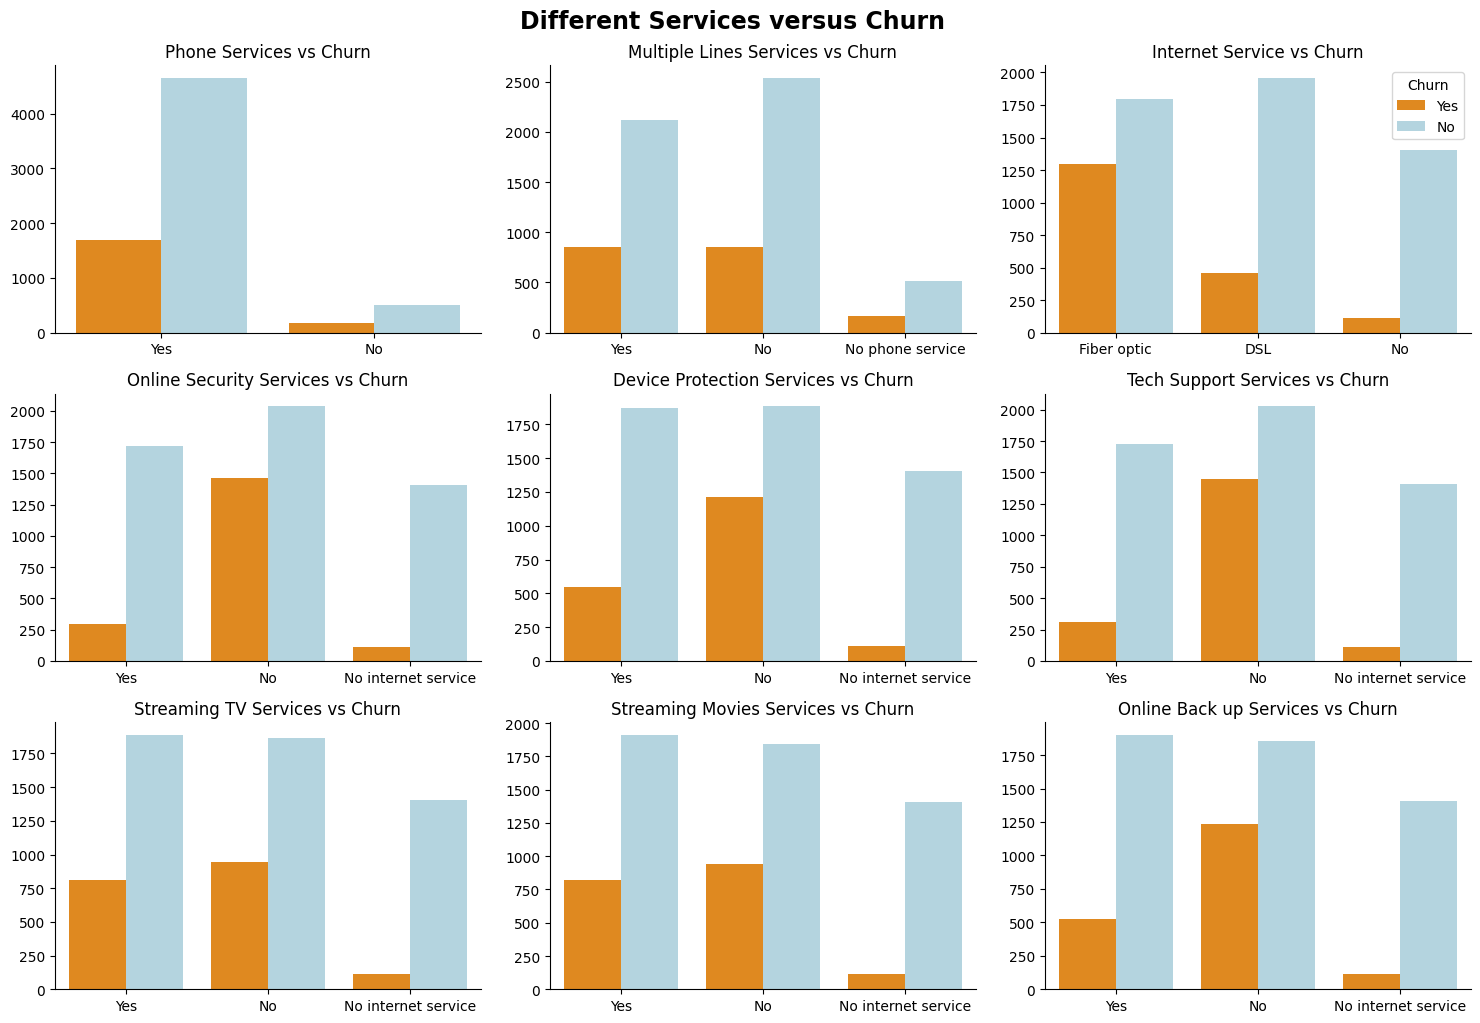

In [17]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

# Light blue for Not Churn, dark orange for Churn
colors = ["darkorange", "lightblue"]

# Set custom color palette
sns.set_palette(sns.color_palette(colors))

# Graphing
sns.countplot(x="Phone Service", hue="Churn",data=rawDat,  ax=axes[0,0]).set(title='Phone Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="Multiple Lines", hue="Churn", data=rawDat, ax=axes[0,1]).set(title='Multiple Lines Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="Internet Service", hue="Churn", data=rawDat, ax=axes[0,2]).set(title='Internet Service vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="Online Security", hue="Churn", data=rawDat, ax=axes[1,0]).set(title='Online Security Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="Device Protection", hue="Churn", data=rawDat, ax=axes[1,1]).set(title='Device Protection Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="Tech Support", hue="Churn", data=rawDat, ax=axes[1,2]).set(title='Tech Support Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="Streaming TV", hue="Churn", data=rawDat, ax=axes[2,0]).set(title='Streaming TV Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="Streaming Movies", hue="Churn", data=rawDat, ax=axes[2,1]).set(title='Streaming Movies Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="Online Backup", hue="Churn",data=rawDat, ax=axes[2,2]).set(title='Online Back up Services vs Churn', xlabel=None, ylabel = None)

# Remove legends except for the upper right one
for i in range(3):
    for j in range(3):
        if i != 0 or j != 2:
            axes[i,j].get_legend().remove()


sns.despine()
plt.tight_layout()

fig.text(0.35, 1, 'Different Services versus Churn', fontsize=17, fontweight='bold') 
plt.show()


#### 5. Billing amounts (total charges and monthly charges)

<ipython-input-18-8da0c9fe69e1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(Churn_0['Monthly Charges'], color= 'blue', shade = True)
<ipython-input-18-8da0c9fe69e1>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(Churn_1['Monthly Charges'], color= 'orange', shade = True)


Text(0.5, 1.0, 'Monthly Charges versus Churn')

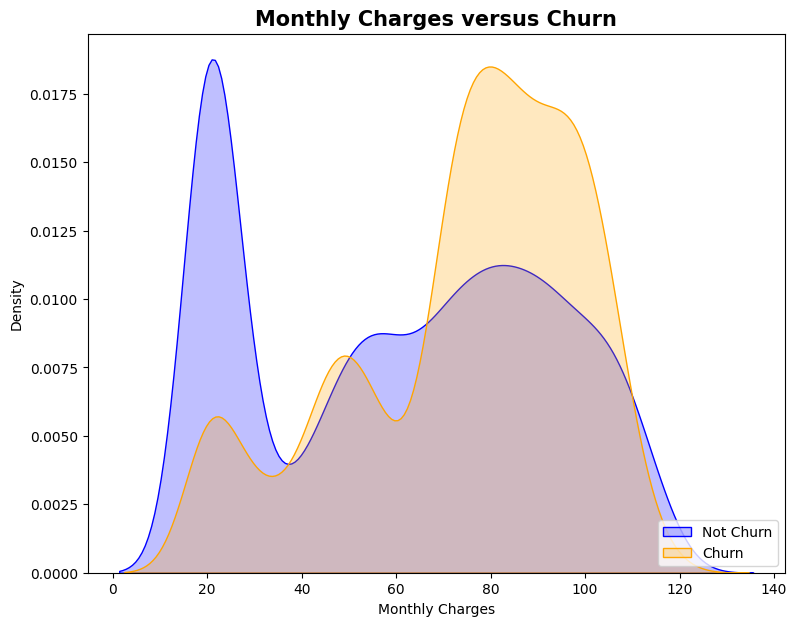

In [18]:
# Monthly charges 
plt.figure(figsize=(9,7))
ax = sns.kdeplot(Churn_0['Monthly Charges'], color= 'blue', shade = True)
ax = sns.kdeplot(Churn_1['Monthly Charges'], color= 'orange', shade = True)
ax.legend(["Not Churn","Churn"],loc='lower right')
plt.title('Monthly Charges versus Churn', fontsize=15, fontweight='bold') 

<ipython-input-19-237ab469e469>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(Churn_0['Total Charges'], color= 'blue', shade = True)
<ipython-input-19-237ab469e469>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(Churn_1['Total Charges'], color= 'orange', shade = True)


Text(0.5, 1.0, 'Total Charges versus Churn')

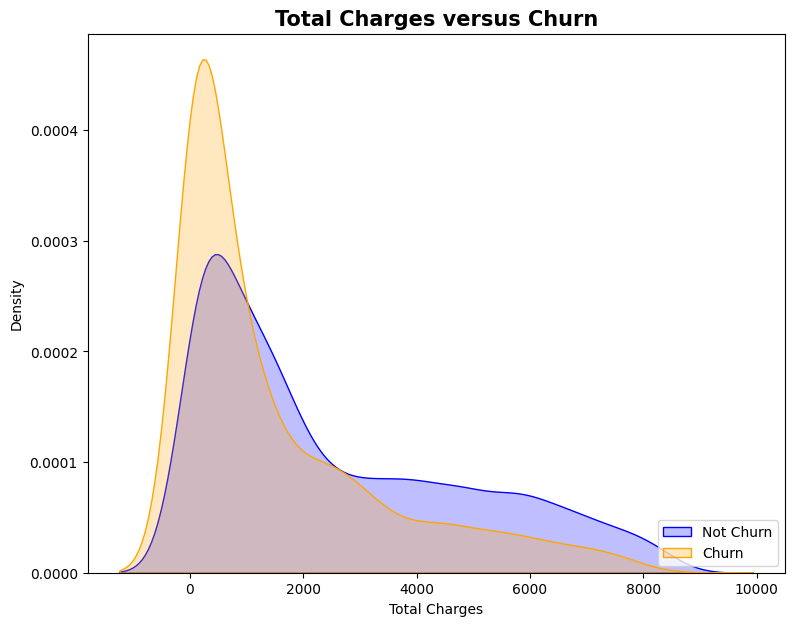

In [19]:
# Total charges 
plt.figure(figsize=(9,7))
ax = sns.kdeplot(Churn_0['Total Charges'], color= 'blue', shade = True)
ax = sns.kdeplot(Churn_1['Total Charges'], color= 'orange', shade = True)
ax.legend(["Not Churn","Churn"],loc='lower right')
plt.title('Total Charges versus Churn', fontsize=15, fontweight='bold') 

#### EDA Key Takeaways:

1. Senior citizens have higher chance to leave the company, but this feature is not salient.

2. Internet and add-on Services: 
First, customers more likely churn do not have add-on services, especially Online Security, Device Protection, Tech Support and Onine Backup services. 

As for Internet Service, people apply for internet service are more likely to churn, in other words, churned customers are NOT satisfied with Telco internet service. Compared to DSL, customers who apply for fiber optic internet channel are more like to leave. Simply put, DSL is old tech while Fiber optic internet, like Google fiber, is a new tech. New technology will always be faster and efficient,  but why it has high opportunity to make customers leave? Our guess is that first, fiber users need to pay higher costs; second, this new tech is not mature so people may get disappointed about the service. This link has more details on the difference between DSL and fiber optic internet:  https://www.vssmonitoring.com/dsl-vs-fiber/

3. For contracts, customers with month-to-month contracts are more likely to churn. Longer contracts provides strong relationship between customers and the firm.

4. Customers who have short amount of time (short tenure) with Telco are more likely to churn. In other words, old customers are more likely to stay with the firm, and this may relates to the more brand loyalty and trust.

5. When it comes to the charges, customers with a higher amount of Monthly Charges are more likely to churn. However, there is no significant difference in Total Charges between these two groups.


---
## Churn Prediction (Supervised Machine Learning)

In this section, we will use machine learning to find the best possible model in a more automated fashion. Specifically, we will train multiple models using as many meaningful predictors as are available in an effort to find the optimal predictive model. The scikit-learn ([sklearn](https://scikit-learn.org/stable/index.html)) package is used to conduct machine learning analysis.

- Model preparation
 - Cross validation 
 - Class balancing
- Model fitting
 - Adaboost
 - Decision Tree
 - Logistic Regression
 - Random Forest
- Model evaluation
 - Performance metrics
 - ROC and refit time curve
 - Confusion matrix
 - Classification report 

Before we get started, let's reset our data to make sure its pristine:

In [20]:
sns.set(rc = {'figure.figsize': (7, 6)},
        font_scale = 1.25)
sns.set_style('whitegrid')

display(rawDat.head(), rawDat.shape)

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
11,361735,2889-FPWRM,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
12,777514,7569-NMZYQ,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
13,546231,9739-JLPQJ,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
14,778066,9788-HNGUT,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
15,535662,8879-XUAHX,No,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No


(7032, 21)

#### Remove irrelevent variables

In [21]:
#Remove the 2 irrelevent columns: 'LoyaltyID' and 'CustomerID'
churnDat=rawDat.drop(['LoyaltyID','Customer ID'],axis =1 )
churnDat.head(5)

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
11,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
12,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
13,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
14,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
15,No,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No


#### Identify Dependent Variable

Before we move ahead with our analysis, let's discuss the *dependent variable (DV)*. In this case, we'll be predicting churn states using 'Churn' column:

First, we should check class balance for the outcome variable (Churn):

In [22]:
churnDat.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

In [23]:
round(churnDat.groupby('Churn').size()/len(churnDat), 3)

Churn
No     0.734
Yes    0.266
dtype: float64

Looks like about 26.5% of the customers will churn.

#### Cross Validation
Let's create a training and holdout testing set (80%/20% of our data, respectively). We will use the training data to fit and evaluate model performance:


In [24]:
#split train and test
Train, Test = train_test_split(churnDat, 
                               stratify = churnDat.Churn,
                               test_size = 0.20, #ideal proportion
                               random_state = 345) #set.seed

In [25]:
#check the spliting percentage
display(len(Train),
        len(Test))

5625

1407

In [26]:
display(round(len(Train)/len(churnDat), 3), 
        round(len(Test)/len(churnDat), 3))

0.8

0.2

#### Class Balancing

While looking at our DV, we saw a clear class imbalance in our training and testing sets:

In [27]:
#check class balance in train data
display(Train.groupby('Churn').size())
round(Train.groupby('Churn').size()/len(Train), 3)

Churn
No     4130
Yes    1495
dtype: int64

Churn
No     0.734
Yes    0.266
dtype: float64

In [28]:
#check class balance in test data
display(Test.groupby('Churn').size())
round(Test.groupby('Churn').size()/len(Test), 3)

Churn
No     1033
Yes     374
dtype: int64

Churn
No     0.734
Yes    0.266
dtype: float64

Fix imbalance data: simply down sample the training data to balance based on the minority class (i.e., the class with fewer observations):
TRY SMOTE LATER !!!!!

In [29]:
np.random.seed(345) # to create reproducible results

maj_class = np.where(Train.Churn == 'No')[0]
min_class = np.where(Train.Churn == 'Yes')[0]

#randomly choose the sample from the maj class, number = min_class (400)
resample = np.random.choice(maj_class, size = len(min_class), replace = False)

#400 from maj_class and the rest 400 are min_class, DS: down sample
TrainDS = pd.concat([Train.iloc[min_class], Train.iloc[resample]])

TrainDS.shape

(2990, 19)

In [30]:
#check the result
display(TrainDS.groupby('Churn').size())
round(TrainDS.groupby('Churn').size()/len(TrainDS), 3)

Churn
No     1495
Yes    1495
dtype: int64

Churn
No     0.5
Yes    0.5
dtype: float64

#### Other model preparation

Let's do some basic preprocessing and checks to ensure our data will suit our models. First, check for missing values in data, which some models cannot handle:

Unvaild rows: drop the 11 rows without total charges

In [31]:
round(TrainDS.isna().sum()/len(TrainDS), 3)

Senior Citizen       0.0
Partner              0.0
Dependents           0.0
Tenure               0.0
Phone Service        0.0
Multiple Lines       0.0
Internet Service     0.0
Online Security      0.0
Online Backup        0.0
Device Protection    0.0
Tech Support         0.0
Streaming TV         0.0
Streaming Movies     0.0
Contract             0.0
Paperless Billing    0.0
Payment Method       0.0
Monthly Charges      0.0
Total Charges        0.0
Churn                0.0
dtype: float64

Next let's take care of dummy encoding (i.e., one hot encoding) the categorical data:

In [32]:
enc = OneHotEncoder(handle_unknown = 'ignore', 
                    sparse = False)

enc_raw_data_train = TrainDS.drop(columns = 'Churn').select_dtypes(include = ['object', 'category'])

enc_raw_data_train
enc = enc.fit(enc_raw_data_train)

encoded_data_train = pd.DataFrame(enc.transform(enc_raw_data_train))

#create dummy
encoded_data_train.columns = enc.get_feature_names_out(enc_raw_data_train.columns)
encoded_data_train.index = enc_raw_data_train.index

TrainDS_Dm_Enc = pd.concat([TrainDS.drop(enc_raw_data_train.columns, axis = 1), encoded_data_train], axis = 1)

TrainDS_Dm_Enc.head()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Tenure,Monthly Charges,Total Charges,Churn,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
1953,50,71.05,3444.85,Yes,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2222,28,105.70,2979.50,Yes,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6650,1,51.25,51.25,Yes,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2348,27,101.25,2754.45,Yes,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7014,1,19.45,19.45,Yes,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Let's also do zero variance (ZV) removal just in case (although there shouldn't be any at this point):

In [33]:
selector = VarianceThreshold()

sel_raw_data_train = TrainDS_Dm_Enc.drop(columns = 'Churn')

selector = selector.fit(sel_raw_data_train)

selected_data_train = sel_raw_data_train.iloc[:, selector.get_support(indices = True)]

TrainDS_Dm_Enc_Sel = pd.concat([TrainDS_Dm_Enc.drop(sel_raw_data_train.columns, axis = 1), selected_data_train], axis = 1)

TrainDS_Dm_Enc_Sel.head()

,Churn,Tenure,Monthly Charges,Total Charges,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
1953,Yes,50,71.05,3444.85,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2222,Yes,28,105.70,2979.50,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6650,Yes,1,51.25,51.25,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2348,Yes,27,101.25,2754.45,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7014,Yes,1,19.45,19.45,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


 we need to apply all of the preprocessing we performed earlier using the training data to the testing data as well so that we can evaluate our models later in the script.

In [34]:
Test.head(5)

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
6266,Yes,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70,Yes
3916,No,Yes,Yes,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.90,1146.05,No
322,No,No,No,63,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),109.20,7049.75,No
2885,Yes,No,No,21,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.25,1973.75,Yes
2516,No,No,No,24,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.15,2494.65,No


In [35]:
#check missing value in test
round(Test.isna().sum()/len(Test), 3)

Senior Citizen       0.0
Partner              0.0
Dependents           0.0
Tenure               0.0
Phone Service        0.0
Multiple Lines       0.0
Internet Service     0.0
Online Security      0.0
Online Backup        0.0
Device Protection    0.0
Tech Support         0.0
Streaming TV         0.0
Streaming Movies     0.0
Contract             0.0
Paperless Billing    0.0
Payment Method       0.0
Monthly Charges      0.0
Total Charges        0.0
Churn                0.0
dtype: float64

In [36]:
# one hot encoding (for categorical data)

enc_raw_data_test = Test.drop(columns = 'Churn').select_dtypes(include = ['object', 'category'])

encoded_data_test = pd.DataFrame(enc.transform(enc_raw_data_test))

encoded_data_test.columns = enc.get_feature_names_out(enc_raw_data_test.columns)
encoded_data_test.index = enc_raw_data_test.index

Test_Enc = pd.concat([Test.drop(enc_raw_data_test.columns, axis = 1), encoded_data_test], axis = 1)

# final result
Test_Enc.head()

,Tenure,Monthly Charges,Total Charges,Churn,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
6266,2,44.70,93.70,Yes,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3916,53,20.90,1146.05,No,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
322,63,109.20,7049.75,No,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2885,21,94.25,1973.75,Yes,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2516,24,104.15,2494.65,No,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Fitting models
We try to fit four models: Decision Tree, AdaBoost, Random Forest, Logisitic Regression, and see which works better for churn prediction.

To see what parameters a model supports, use the get_params method; for example, for a decision tree classifer, we can use:

In [37]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [38]:
X_train = TrainDS_Dm_Enc_Sel.drop(columns = 'Churn')
y_train = TrainDS_Dm_Enc_Sel.Churn

X_test = Test_Enc.drop(columns = 'Churn')
y_test = Test_Enc.Churn

pos_label = 'Yes'

# set up scoring metric
scoring_metric = 'balanced_accuracy'

# set up classifiers and tuning parameters
names = ['Decision Tree', 'AdaBoost', 'Random Forest', 'Logistic Regression']
classifiers = [DecisionTreeClassifier(random_state = 345), 
               AdaBoostClassifier(random_state = 345), 
               RandomForestClassifier(random_state = 345), 
               LogisticRegression(random_state = 345, solver = 'liblinear')]
param_grids = [{'max_depth': [2, 3, 4, 5, 10, 15], 'criterion': ['gini', 'entropy']},
               {'n_estimators': [50, 100, 200]},
               {'max_depth': [2, 3, 4], 'max_features': [None, 'sqrt', 'log2'], 'n_estimators': [50, 100, 200]}, 
               {'penalty': ['l1', 'l2']}]

# create empty lists for storing outcomes
models = []
preds = []
probs = []

BAs = []
Pre = []
Rec = []
F1 = []
AUCs = []
FPRs = []
TPRs = []
timings = []

# train classifiers and generate test predictions/probabilities
for i, eachClassifier in enumerate(classifiers):
    
    print('Now working on model ', i + 1, ' of ', len(classifiers), ': ', names[i], sep = '')
    
    # define cross-validation/parameter tuning settings
    search = GridSearchCV(eachClassifier, 
                          param_grids[i], 
                          cv = 5, # using (Stratified)KFold by default (with 5 folds)
                          scoring = scoring_metric,
                          n_jobs = -1) # use parallel processing
    
    model = search.fit(X_train, y_train)
    pred = search.predict(X_test)
    prob = search.predict_proba(X_test)[:, 1]
    
    models.append(model)
    preds.append(pred)
    probs.append(prob)
    
    BAs.append(balanced_accuracy_score(y_test, pred))
    Pre.append(precision_score(y_test, pred, average="binary", pos_label="No"))
    Rec.append(recall_score(y_test, pred, average="binary", pos_label="No"))
    F1.append(f1_score(y_test, pred, average="binary", pos_label="No"))

    AUCs.append(roc_auc_score(y_test, prob))
    
    FPR, TPR, _ = roc_curve(y_test, prob, pos_label = pos_label)
    
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    timings.append(model.refit_time_)
    
print('Finished!')

Now working on model 1 of 4: Decision Tree
Now working on model 2 of 4: AdaBoost
Now working on model 3 of 4: Random Forest
Now working on model 4 of 4: Logistic Regression
Finished!


### Model evaluation with Performance matrix

Now we can create a DataFrame of our results, sorted by the highest (i.e., best) balanced accuracy/AUC score on the testing data:

In [39]:
results = pd.DataFrame({'Classifier': names, 
                        'Balanced Acc': BAs, 
                        'Pre': Pre, 
                        'Rec': Rec, 
                        'F1': F1,
                        'TPR': TPRs, 
                        'FPR': FPRs,
                        'AUC': AUCs, 
                        'Refit Time': timings}).sort_values(['AUC'], ascending = False)

display(round(results[['Classifier', 'Refit Time', 'Balanced Acc', 'Pre', 'Rec', 'F1', 'AUC']], 3))

,Classifier,Refit Time,Balanced Acc,Pre,Rec,F1,AUC
1,AdaBoost,0.344,0.786,0.930,0.721,0.812,0.854
3,Logistic Regression,0.024,0.782,0.927,0.722,0.812,0.854
2,Random Forest,0.491,0.764,0.919,0.700,0.795,0.844
0,Decision Tree,0.019,0.754,0.910,0.701,0.792,0.812


We can also plot these data to see which model performed best (e.g., based on AUC), colored relative to model refit time (where lower, greener times are better):

<ipython-input-40-2ecf77b6632e>:2: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  cm.register_cmap('green_to_red', greenToRed)
<ipython-input-40-2ecf77b6632e>:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(smRTs)


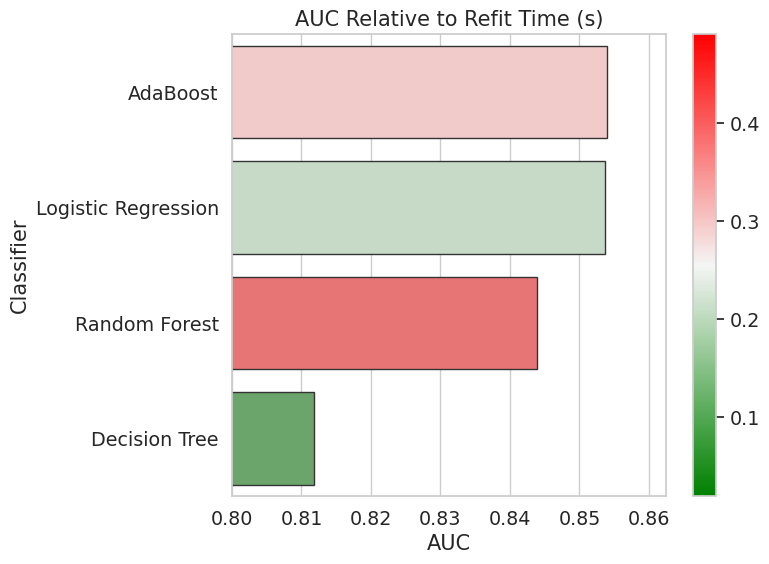

In [40]:
greenToRed = LinearSegmentedColormap.from_list('', ['green', 'whitesmoke', 'red'])
cm.register_cmap('green_to_red', greenToRed)

normRTs = plt.Normalize(results['Refit Time'].min(), results['Refit Time'].max())
smRTs = plt.cm.ScalarMappable(cmap = 'green_to_red', norm = normRTs)

ax = sns.barplot(y = 'Classifier', 
                 x = 'AUC', 
                 hue = 'Refit Time', 
                 dodge = False, 
                 palette = 'green_to_red', 
                 edgecolor = '.2', 
                 data = results)

ax.get_legend().remove()
ax.figure.colorbar(smRTs)
ax.set(title = 'AUC Relative to Refit Time (s)')
ax.set(xlim = (math.floor(results.AUC.min() * 10) * 10/100, 
               results.AUC.max() * 1.01))

plt.show()


We can also compare our models visually by plotting the receiver operating characteristic (ROC) curves for each model:

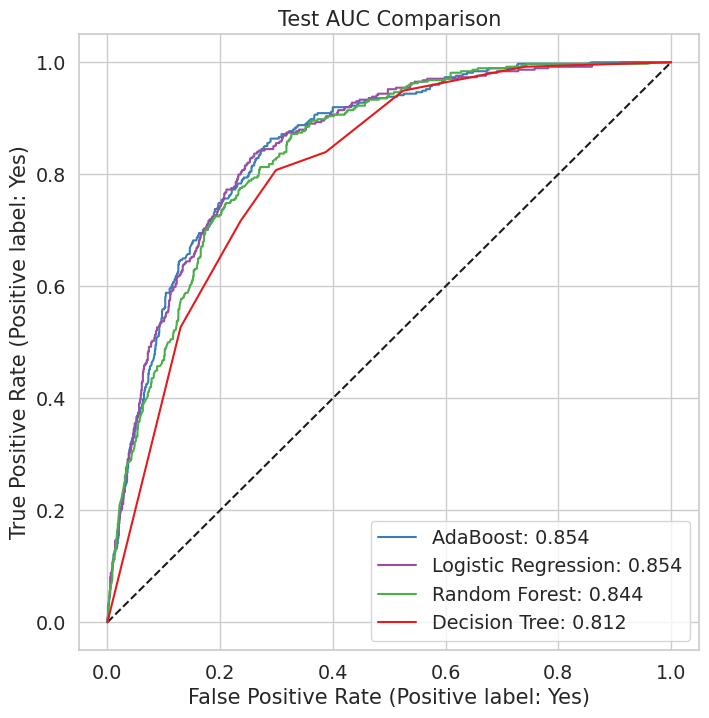

In [41]:
# defining a custom function for reuse later
def Custom_ROC_Plot (results, X_test, y_test, title, figwidth = 8, figheight = 8):

    fig, ax = plt.subplots(figsize = (figwidth, figheight))

    ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
    ax.set(title = title)

    for i in results.index:
        RocCurveDisplay.from_estimator(models[i], 
                                       X_test, 
                                       y_test, 
                                       color = cm.Set1(i), 
                                       label = results.loc[i, 'Classifier'] + ': {:.3f}'.format(results.loc[i, 'AUC']), 
                                       ax = ax)
        
    return([fig, ax])

fig, ax = Custom_ROC_Plot(results, X_test, y_test, title = 'Test AUC Comparison')

Overall these models all perform pretty similarly and are within rounding error of each other, but we'll focus on AdaBoost with the highest AUC.

Let's pull out the index of our best model from our results (i.e., the first index from the DataFrame, since it was sorted by descending AUC):

In [42]:
best_index = results.index[0]
best_index

1

In [43]:
models[best_index].best_estimator_

AdaBoostClassifier(random_state=345)

#### Confusion matrix

In [44]:
# simple printed matrix
confusion_matrix(y_test, preds[best_index])

array([[745, 288],
       [ 56, 318]])

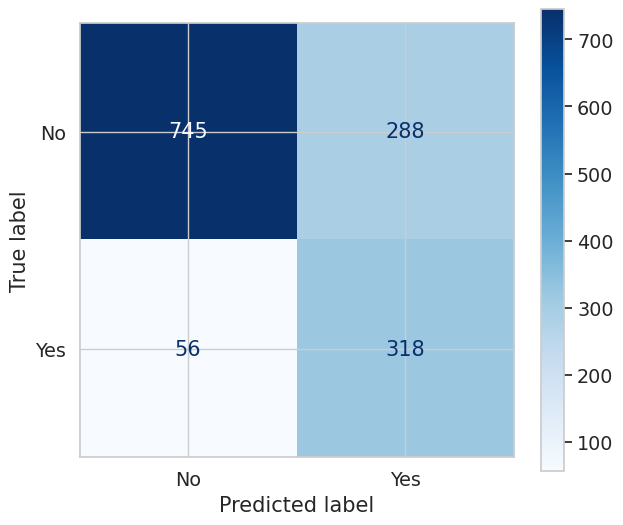

In [45]:
ConfusionMatrixDisplay.from_estimator(models[best_index], 
                                      X_test, 
                                      y_test,
                                      cmap = plt.cm.Blues,
                                      values_format = 'd')

In [46]:
TP = 318  # True Positive
TN = 745 # True Negative
FP = 56 # False Positive
FN = 288  # False Negative

test_metrics = pd.DataFrame({
    'Sensitivity': [TP/(TP+FN)], 
    'Specificity': [TN/(TN+FP)], 
    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)],
    'TPR': [TP/(TP+FP)], 
    'FPR': [TN/(TN+FN)], 
    'F1': [TP/(TP+.5*(FP+FN))]})

test_metrics['Balanced Acc'] = np.mean([test_metrics.Sensitivity, test_metrics.Specificity])

round(test_metrics, 3)

,Sensitivity,Specificity,Accuracy,TPR,FPR,F1,Balanced Acc
0,0.525,0.93,0.756,0.85,0.721,0.649,0.727


In [47]:
results.loc[best_index, ['Classifier', 'Balanced Acc']]

Classifier      AdaBoost
Balanced Acc    0.785734
Name: 1, dtype: object

To see a number of these evaluation metrics all at once,we generate a classification report:

In [48]:
print(classification_report(y_test, preds[best_index], digits = 3))

              precision    recall  f1-score   support

          No      0.930     0.721     0.812      1033
         Yes      0.525     0.850     0.649       374

    accuracy                          0.756      1407
   macro avg      0.727     0.786     0.731      1407
weighted avg      0.822     0.756     0.769      1407



---
## Factorial Analysis

### Plot important churners using AdaBoost

<Axes: xlabel='importance', ylabel='feature'>

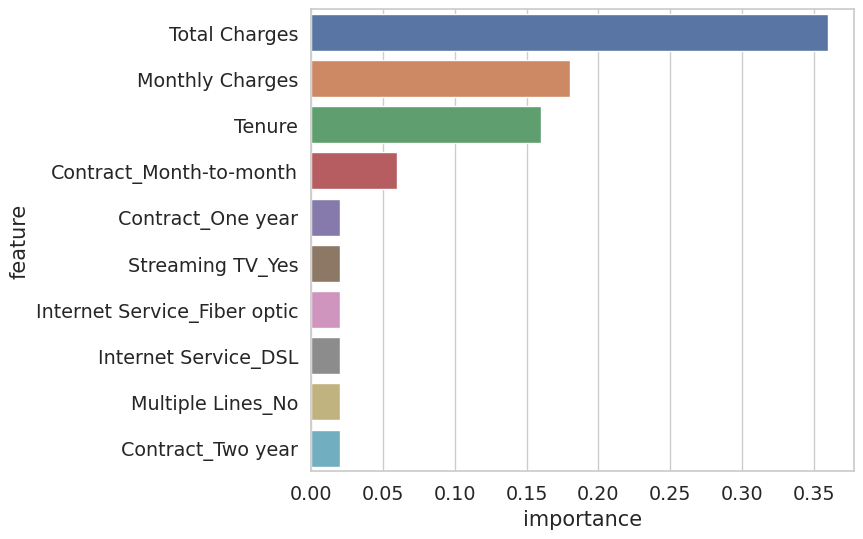

In [49]:
# for models with feature importances
if hasattr(models[best_index].best_estimator_, 'feature_importances_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance': models[best_index].best_estimator_.feature_importances_}).sort_values('importance', ascending = False)
# for models with coefficients (directional) -- note: for interpretation and potential caveats, see https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html
elif hasattr(models[best_index].best_estimator_, 'coef_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance_abs': abs(models[best_index].best_estimator_.coef_[0]), 
        'importance': models[best_index].best_estimator_.coef_[0]}).sort_values('importance_abs', ascending = False)
    
sns.barplot(y = 'feature', 
            x = 'importance', 
            data = var_imp.head(10))

### Plot Decision Trees

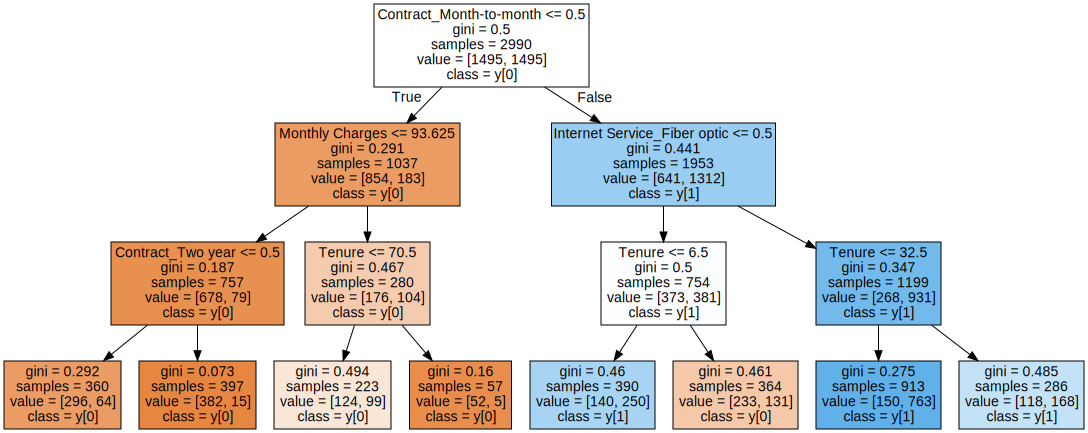

In [50]:

from IPython.display import SVG
from graphviz import Source

DecisionTree = models[results.query('Classifier == "Decision Tree"').index[0]].best_estimator_

graph = Source(tree.export_graphviz(DecisionTree, 
                                    out_file = None, 
                                    feature_names = X_test.columns, 
                                    class_names = True, 
                                    filled = True))

SVG(graph.pipe(format = 'svg'))

Find what the color means:

In [51]:
#rawDat.groupby('Contract').Churn.
t1 = rawDat.copy()
t1['BoolChurn'] = rawDat.Churn.replace({'No': 0, 'Yes': 1})
t1.groupby('Contract').BoolChurn.mean()

Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: BoolChurn, dtype: float64

#### Insights of decision tree
1. Blue means the likelihood to churn. Orange means the likelihood to stay with the company.

2. The dark blue root illustrated that customers who have month-to-month contract, DSL internet, and tenure less than 32 months are more likely to churn. 

3. The dark orange root presents a group of customers who have two year contract and monthly charges over 93 USD are more likely to stay with the company.

---
## Customer segmentation

Sort the customers based on probability to churn in test data

In [52]:
Test_seg = Test_Enc.copy()
Test_seg['probs'] = probs[best_index] #use best model: adaboost
Test_seg['preds'] = preds[best_index] 
Test_seg = Test_seg.sort_values('probs')
Test_seg

,Tenure,Monthly Charges,Total Charges,Churn,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,probs,preds
60,71,113.65,8166.80,No,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.388393,No
30,72,115.05,8405.00,No,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.388393,No
48,72,114.05,8289.20,No,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.390135,No
51,72,113.10,8248.50,No,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.390135,No
23,72,114.05,8468.20,No,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.390135,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6454,1,74.40,74.40,Yes,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.520649,Yes
6339,1,84.60,84.60,No,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.521045,Yes
6252,1,95.45,95.45,Yes,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.521045,Yes
6228,1,100.25,100.25,Yes,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.521305,Yes


In [53]:
#scale 
from sklearn.preprocessing import MinMaxScaler
# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()
# Scaling the probs column of the created dataFrame and storingthe result in Scaledprobs Column
Test_seg[["Scaledprobs"]] = scaler.fit_transform(Test_seg[["probs"]])
Test_seg

,Tenure,Monthly Charges,Total Charges,Churn,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,probs,preds,Scaledprobs
60,71,113.65,8166.80,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.388393,No,0.000000
30,72,115.05,8405.00,No,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.388393,No,0.000000
48,72,114.05,8289.20,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.390135,No,0.012992
51,72,113.10,8248.50,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.390135,No,0.012992
23,72,114.05,8468.20,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.390135,No,0.012992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6454,1,74.40,74.40,Yes,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.520649,Yes,0.986726
6339,1,84.60,84.60,No,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.521045,Yes,0.989685
6252,1,95.45,95.45,Yes,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.521045,Yes,0.989685
6228,1,100.25,100.25,Yes,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.521305,Yes,0.991626


### Naive segmentation
The scaled probability represents the likelihood to churn, which is ranked from high to low. The test set was divided into three groups, in each of which customers are ‘Not likely to Churn’ (NC), ‘Might Churn’ (MC) and ‘More likely to Churn’ (C).

In [54]:
def churn_stats(value):
    if value <=0.6:
        return "NC"
    if 0.6 < value <= 0.8:
        return "MC"
    elif value > 0.8:
        return "C"
 
Test_seg['Cluster'] = Test_seg['Scaledprobs'].map(churn_stats)
Test_seg

,Tenure,Monthly Charges,Total Charges,Churn,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,probs,preds,Scaledprobs,Cluster
60,71,113.65,8166.80,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.388393,No,0.000000,NC
30,72,115.05,8405.00,No,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.388393,No,0.000000,NC
48,72,114.05,8289.20,No,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.390135,No,0.012992,NC
51,72,113.10,8248.50,No,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.390135,No,0.012992,NC
23,72,114.05,8468.20,No,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.390135,No,0.012992,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6454,1,74.40,74.40,Yes,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.520649,Yes,0.986726,C
6339,1,84.60,84.60,No,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.521045,Yes,0.989685,C
6252,1,95.45,95.45,Yes,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.521045,Yes,0.989685,C
6228,1,100.25,100.25,Yes,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.521305,Yes,0.991626,C


In [55]:
df1 = pd.DataFrame()
df1['Cluster'] = Test_seg['Cluster']  
df1['number of customers'] =  Test_seg.groupby(Test_seg['Cluster'])['Churn'].transform('count')
df1= df1.drop_duplicates()
df1

,Cluster,number of customers
60,NC,13
3377,MC,600
123,C,794


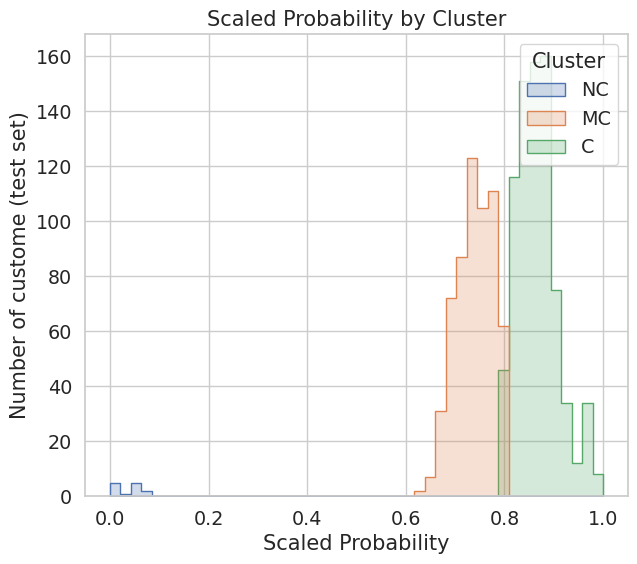

In [56]:
sns.histplot(data=Test_seg, x="Scaledprobs", hue="Cluster", element="step")
plt.title('Scaled Probability by Cluster')
plt.xlabel('Scaled Probability')
plt.ylabel('Number of custome (test set)')
plt.show()

#### Summary of Naive clusters
The label "High" indicates that among three clusters, this particular cluster has the highest number of customers with a specific attribute, while "Low" indicates a lower number of customers with the attribute.

In [57]:
# table presenting number of customers in each cluster in terms of different features
cluster_sum = pd.DataFrame()

cluster_sum['Cluster'] = Test_seg['Cluster']

cluster_sum['Senior Citizen'] = Test_seg.groupby('Cluster')['Senior Citizen_Yes'].transform('sum')
cluster_sum['Tenure'] = Test_seg.groupby('Cluster')['Tenure'].transform('sum')
cluster_sum['Monthly Charges'] = Test_seg.groupby('Cluster')['Monthly Charges'].transform('sum')
cluster_sum['Total Charges'] = Test_seg.groupby('Cluster')['Total Charges'].transform('sum')
cluster_sum['Contract_Month-to-month'] = Test_seg.groupby('Cluster')['Contract_Month-to-month'].transform('sum')
cluster_sum['Internet Service_DSL'] = Test_seg.groupby('Cluster')['Internet Service_DSL'].transform('sum')
cluster_sum['Internet Service_FO'] = Test_seg.groupby('Cluster')['Internet Service_Fiber optic'].transform('sum')
cluster_sum['Internet Service_No'] = Test_seg.groupby('Cluster')['Internet Service_No'].transform('sum')
cluster_sum['Streaming TV'] = Test_seg.groupby('Cluster')['Streaming TV_Yes'].transform('sum')
cluster_sum['Streaming Movies'] = Test_seg.groupby('Cluster')['Streaming Movies_Yes'].transform('sum')
cluster_sum['Paperless Billing'] = Test_seg.groupby('Cluster')['Paperless Billing_Yes'].transform('sum')
cluster_sum['Auto Payment_Bank'] = Test_seg.groupby('Cluster')['Payment Method_Bank transfer (automatic)'].transform('sum')
cluster_sum['Auto Payment_Credit'] = Test_seg.groupby('Cluster')['Payment Method_Credit card (automatic)'].transform('sum')

cluster_sum=cluster_sum.drop_duplicates().transpose()
cluster_sum.columns=cluster_sum.iloc[0] 
cluster_sum =cluster_sum[1:]
cluster_sum

cluster_rank = cluster_sum.rank(axis=1, ascending=False, method='first')
cluster_rank = cluster_rank.replace([1,2,3],['High','Middle','Low'])
cluster_rank

Cluster,NC,MC,C
Senior Citizen,Low,Middle,High
Tenure,Low,High,Middle
Monthly Charges,Low,Middle,High
Total Charges,Low,High,Middle
Contract_Month-to-month,Low,Middle,High
Internet Service_DSL,Low,High,Middle
Internet Service_FO,Low,Middle,High
Internet Service_No,Low,High,Middle
Streaming TV,Low,Middle,High
Streaming Movies,Low,Middle,High


### K-means clustering
1. prepare data based on MC and C
2. run k-means based on elbow plot
3. profile customers

In [58]:
Test_churn = Test_seg.loc[Test_seg['Cluster'] != 'NC']
Test_churn = Test_churn.drop(columns = ['Churn','probs','preds', 'Scaledprobs','Cluster'])
Test_churn
# Test_churn.dtypes

,Tenure,Monthly Charges,Total Charges,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
3377,72,20.50,1502.25,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3642,72,19.95,1322.85,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3560,72,19.70,1379.80,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3529,71,19.80,1396.25,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3563,71,19.45,1378.45,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6454,1,74.40,74.40,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6339,1,84.60,84.60,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6252,1,95.45,95.45,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6228,1,100.25,100.25,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

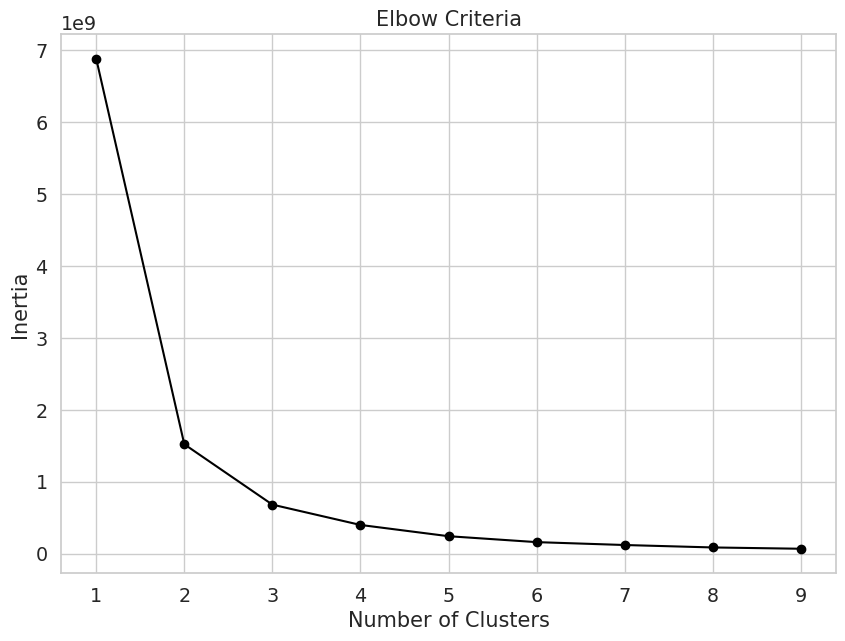

In [59]:
# K-Means Clusters
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 7))
    plt.plot(means, inertias, 'o-', color = 'black')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.title("Elbow Criteria")
    plt.show()
    
optimise_k_means(Test_churn, 10)

In [60]:
# K-Means clustering
kmeans = KMeans(n_clusters = 3, random_state=10)
kmeans.fit(Test_churn)
# Save cluster group as a column
Test_churn['Cluster'] = kmeans.labels_
# Test_churn.dtypes

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [61]:
#rename clusters
Test_churn['Cluster'] = Test_churn['Cluster'].replace([0,1,2],['A','B','C'])
Test_churn

,Tenure,Monthly Charges,Total Charges,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Cluster
3377,72,20.50,1502.25,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,C
3642,72,19.95,1322.85,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,C
3560,72,19.70,1379.80,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,C
3529,71,19.80,1396.25,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,C
3563,71,19.45,1378.45,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6454,1,74.40,74.40,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,C
6339,1,84.60,84.60,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,C
6252,1,95.45,95.45,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,C
6228,1,100.25,100.25,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,C


In [62]:
# table presenting number of customers in each cluster in terms of different features
cluster_sum = pd.DataFrame()

cluster_sum['Cluster'] = Test_churn['Cluster']

cluster_sum['Senior Citizen'] = Test_churn.groupby('Cluster')['Senior Citizen_Yes'].transform('sum')
cluster_sum['Tenure'] = Test_churn.groupby('Cluster')['Tenure'].transform('sum')
cluster_sum['Monthly Charges'] = Test_churn.groupby('Cluster')['Monthly Charges'].transform('sum')
cluster_sum['Total Charges'] = Test_churn.groupby('Cluster')['Total Charges'].transform('sum')
cluster_sum['Contract_Month-to-month'] = Test_churn.groupby('Cluster')['Contract_Month-to-month'].transform('sum')
cluster_sum['Internet Service_DSL'] = Test_churn.groupby('Cluster')['Internet Service_DSL'].transform('sum')
cluster_sum['Internet Service_FO'] = Test_churn.groupby('Cluster')['Internet Service_Fiber optic'].transform('sum')
cluster_sum['Internet Service_No'] = Test_churn.groupby('Cluster')['Internet Service_No'].transform('sum')
cluster_sum['Streaming TV'] = Test_churn.groupby('Cluster')['Streaming TV_Yes'].transform('sum')
cluster_sum['Streaming Movies'] = Test_churn.groupby('Cluster')['Streaming Movies_Yes'].transform('sum')
cluster_sum['Paperless Billing'] = Test_churn.groupby('Cluster')['Paperless Billing_Yes'].transform('sum')
cluster_sum['Auto Payment_Bank'] = Test_churn.groupby('Cluster')['Payment Method_Bank transfer (automatic)'].transform('sum')
cluster_sum['Auto Payment_Credit'] = Test_churn.groupby('Cluster')['Payment Method_Credit card (automatic)'].transform('sum')

cluster_sum=cluster_sum.drop_duplicates().transpose()
cluster_sum.columns=cluster_sum.iloc[0]
cluster_sum =cluster_sum[1:]
cluster_sum

Cluster,C,A,B
Senior Citizen,111.0,60.0,61.0
Tenure,13813,13571,16433
Monthly Charges,39737.45,25070.95,24520.25
Total Charges,501607.95,984800.4,1567936.85
Contract_Month-to-month,579.0,168.0,47.0
Internet Service_DSL,260.0,150.0,82.0
Internet Service_FO,253.0,172.0,174.0
Internet Service_No,299.0,4.0,0.0
Streaming TV,138.0,171.0,198.0
Streaming Movies,152.0,174.0,207.0


Summarize K clusters

In [63]:
cluster_rank = cluster_sum.rank(axis=1, ascending=False, method='first')
cluster_rank = cluster_rank.replace([1,2,3],['High','Middle','Low'])
cluster_rank = cluster_rank.reindex(columns=['A', 'B', 'C'])
cluster_rank

Cluster,A,B,C
Senior Citizen,Low,Middle,High
Tenure,Low,High,Middle
Monthly Charges,Middle,Low,High
Total Charges,Middle,High,Low
Contract_Month-to-month,Middle,Low,High
Internet Service_DSL,Middle,Low,High
Internet Service_FO,Low,Middle,High
Internet Service_No,Middle,Low,High
Streaming TV,Middle,High,Low
Streaming Movies,Middle,High,Low


In [64]:
df2 = pd.DataFrame()
df2['Cluster'] = Test_churn['Cluster']  

df2['# of customers'] = Test_churn.groupby('Cluster')['Tenure'].transform('count')
totalrows = len(Test_churn.index)
df2['% of customers'] = df2['# of customers']/totalrows

df2['Prob of Churn'] = Test_seg['probs']
df2['Scaled Prob of Churn'] = Test_seg['Scaledprobs']
df2['Prob of Churning (%)'] = df2.groupby('Cluster')['Prob of Churn'].transform('mean')
df2['Scaled Prob of Churning (%)'] = df2.groupby('Cluster')['Scaled Prob of Churn'].transform('mean')
df2 = df2.drop(['Prob of Churn','Scaled Prob of Churn'], axis=1)
df2 = df2.drop_duplicates()
df2

,Cluster,# of customers,% of customers,Prob of Churning (%),Scaled Prob of Churning (%)
3377,C,812,0.582496,0.498689,0.822890
2986,A,326,0.233859,0.496698,0.808040
923,B,256,0.183644,0.492612,0.777554


#### Numeric Distribution by cluster

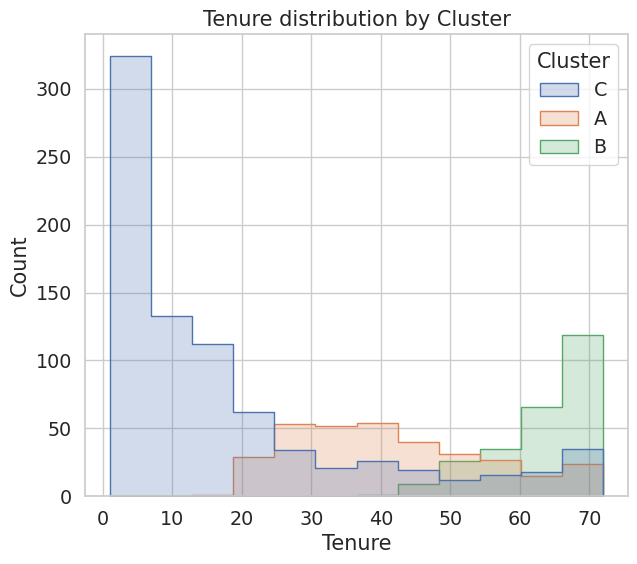

In [65]:
# explore how do the important features perform in each cluster
sns.histplot(data=Test_churn, x="Tenure", hue="Cluster", element="step")
plt.title('Tenure distribution by Cluster')
plt.show()

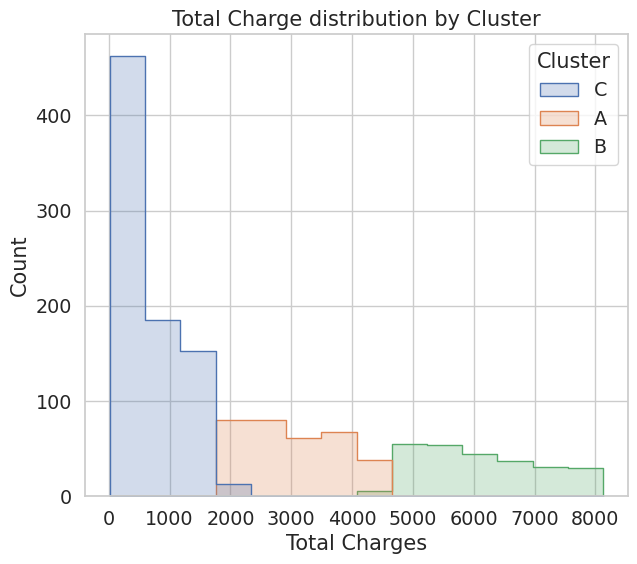

In [66]:
sns.histplot(data=Test_churn, x="Total Charges", hue="Cluster", element="step")
plt.title('Total Charge distribution by Cluster')
plt.show()

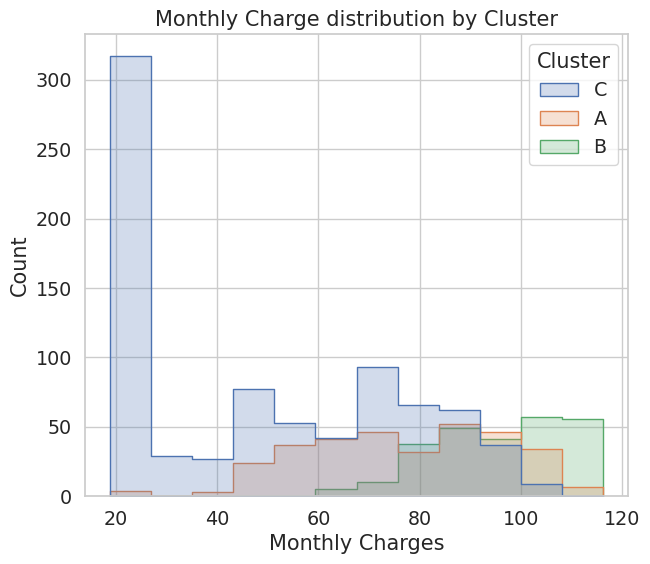

In [67]:
sns.histplot(data=Test_churn, x="Monthly Charges", hue="Cluster", element="step")
plt.title('Monthly Charge distribution by Cluster')
plt.show()

---
## Conclusion and Discussion

### 1. Integrated customer analytics framework
In the context of the competitive telecom market, this paper proposed an integrated customer analytics framework to propose retention strategies and save customers who are about to leave. This research contributes to the existing literature from these aspects. First, based on previous studies on telecom churn management, this research fills the research gap by proposing an integrated customer analytics framework to connect the churn prediction and customer segmentation. The factor analysis links these two sections with in-depth understanding of reasons for churn. 

### 2. Conclusion in churn prediction 
After comparing four machine learning algorithms, AdaBoost, which is the top model, achieves the highest F1-score at 81.2%, and the highest AUC value at 85.4%. Additionally, the down-sampling method is beneficial to improve the performance of an imbalanced dataset, and the model evaluation matrix helps explain the model outcomes with solid measurements. Factorial analysis stressed on the importance of billing amount, tenure, contract types, and add-on internet services on predicting customer churn. These churn contributors require more attention in the processes of quality management, customer services, and other retention strategies. 

### 3. Insights from churn segmentation
For customer segmentation, churn customers are segmented into three groups, using K-means clustering. The overall probability of churning in customer segments allows managers to implement targeted strategies to different churning situations. Each segment has a customer profile that can help telecom companies to better understand different behavioral patterns and demands. Among all churn customers, Cluster C will be more likely to churn and has a large number of customers compared to the other two segments, indicating that a group of new customers have a large demand for basic services and have contributed to operators. The reason for their churn is probably because they did not receive satisfactory internet service. To improve the attraction of internet services, the telecom company could improve the service stability and refine the pricing strategy. For example, by introducing a system of tiered pricing for different internet quality options, more customers would be more satisfied with internet services thus staying with the company. 

### 4. Trade-off for Telecom marketers. 
Cluster B is also an important segment who are more likely to grow with the company and respond proactively to the advent of technology and new services. They contribute great customer loyalty and are interested in high-end services and streaming services. The reason for their churn may relate to the performance of high-end services is not competitive enough to prevent cluster B customers from margining to other market rivals. There is a trade off for telecom marketers to decide whether to invest in differentiated service to high-value but a smaller size of Cluster B customers, or low-cost services to a much wider customer base in Cluster C. 

